In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [2]:
#Ob_set is the Obesity set of date. It has the obesity rates from 2004 - 2012 per county
#Lets load in the data toutilize it further
#"number yyyy" is the percentage of obese idividuals based on the surverys done each year for the entire county
Obset = pd.read_excel("OB_PREV_ALL_STATES.xlsx", "obesity")
#Remove all the extra data in the Obesity list to leave just the numbers and % obese per county
for col in Obset.columns[4:]:
    if 'number' not in col and 'percent' not in col or 'age' in col:
        del Obset[col]

In [3]:
#Food Access Data
FoodAccess = pd.read_excel("FoodSecAllup.xls", 'ACCESS')

#Food Security
FoodSecRest = pd.read_excel("FoodSecAllup.xls", 'RESTAURANTS')

#Food Stores Density
FoodSecStore = pd.read_excel("FoodSecAllup.xls", 'STORES')

#Farmers Market Data
FarmMkt = pd.read_csv("Farmers_market_Dir.csv")

In [4]:
#Drop (remove) the columns in the farmers market data set that we dont need
#remove all coumns but 9 & 10
FarmMkt = FarmMkt.drop(FarmMkt.columns[1:8], axis=1)#,inplace=True)
FarmMkt = FarmMkt.drop(FarmMkt.columns[4:], axis=1)
FarmMkt = FarmMkt.dropna(subset=['County'], how='all') #drop all rows that have any NaN values
#make a new column in FarmMkt and Obset to be a key to match the county/state pair
Obset['CSKey'] = Obset[['County','State']].sum(axis=1)
FarmMkt['CSKey'] = FarmMkt[['County','State']].sum(axis=1)

#New frame for the group by for the farmers market data
NewFrame = FarmMkt.groupby('CSKey').count()
NewFrame = NewFrame.drop(NewFrame.columns[1:], axis=1)
NewFrame.columns = ['FarmersMkts Per County']
#then merge it with the OBesity set to have the Fearmers market counts
#Obset['FarmersMkts Per County'] = Obset.merge(NewFrame, on=NewFrame.index, how='left')
Obset = pd.merge(Obset, NewFrame, how='left', left_on='CSKey',left_index=False, right_index=True, sort=True, copy=True)
#then drop the Key from the Obset data as no longer needed
Obset = Obset.drop(Obset.columns[Obset.columns.get_loc('CSKey')], axis=1)
#Change all the Nan values in the Famers count to 0
Obset['FarmersMkts Per County'] = Obset['FarmersMkts Per County'].fillna(int(0))
#Change all the Farmers market vals to ints
Obset['FarmersMkts Per County'] = Obset['FarmersMkts Per County'].astype(int)

In [5]:
#drop the unwanted columsn - most data from 07 since we are using the obesity rates from 2012
FoodSecStore = FoodSecStore.drop('GROC07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_GROC_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('GROCPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_GROCPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SUPERC07', axis=1)
FoodSecStore = FoodSecStore.drop('SUPERCPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('CONVS07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_CONVS_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('CONVSPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_CONVSPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SPECS07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SPECS_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SPECSPTH07', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SPECSPTH_07_12', axis=1)
FoodSecStore = FoodSecStore.drop('SNAPS08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SNAPS_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('SNAPSPTH08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SNAPSPTH_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('WICS08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_WICS_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('WICSPTH08', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_WICSPTH_08_12', axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SUPERC_07_12',axis=1)
FoodSecStore = FoodSecStore.drop('PCH_SUPERCPTH_07_12',axis=1)
NewFrame = FoodSecStore.drop(['FIPS','State','County','GROC12','SUPERC12',
                                               'CONVS12','SPECS12','SNAPS12','WICS12'],axis=1)
#Merge Food security
Obset = pd.merge(Obset, NewFrame, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)

In [6]:
#Merge Access
Obset = pd.merge(Obset, FoodAccess, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)

In [9]:
#delete any NaN values for a better data set
Obset = Obset.dropna(how='any')
#Drop extra columns
Obset = Obset.drop(Obset.columns[3:15], axis=1)
Obset = Obset.drop('number 2010', axis=1)
Obset = Obset.drop('number 2011', axis=1)
Obset = Obset.drop('number 2012', axis=1)

In [15]:
#Merge Restaurants
Obset = pd.merge(Obset, FoodSecRest, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)

In [ ]:
sns.pairplot(Obset, size=2.5)

In [16]:
Obset.describe()

,FIPS Codes,percent 2010,percent 2011,percent 2012,FarmersMkts Per County,GROCPTH12,SUPERCPTH12,CONVSPTH12,SPECSPTH12,SNAPSPTH12,...,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,...,3102.000000,3104.000000,3079.000000,3102.000000,3104.000000,3104.000000,3090.000000,3104.000000,3090.000000,3104.000000
mean,30300.153351,30.573550,30.714948,30.975451,2.365013,0.254327,0.018088,0.600347,0.050439,0.878062,...,69.251773,73.067655,5.087090,0.804665,0.791591,2.465542,472.235275,641.305770,463.400324,623.492736
std,15030.300327,4.243605,4.341077,4.463309,5.238724,0.213221,0.022920,0.306860,0.068156,0.372703,...,228.446181,242.184530,34.733455,0.590937,0.593958,34.131184,57.312878,97.074876,83.252750,128.320499
min,1001.000000,13.100000,12.000000,10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,321.000000,402.097804,261.000000,371.845051
25%,18182.500000,28.400000,28.400000,28.600000,0.000000,0.143215,0.000000,0.409986,0.000000,0.629759,...,7.000000,7.000000,-10.526316,0.507027,0.500670,-12.612969,433.000000,576.210444,410.000000,534.383583
50%,29162.000000,30.700000,30.900000,31.200000,1.000000,0.196502,0.014129,0.554756,0.036534,0.818923,...,17.000000,17.000000,0.000000,0.684092,0.682110,0.000000,482.000000,632.337378,460.000000,617.339007
75%,45049.500000,33.200000,33.400000,33.700000,2.000000,0.287953,0.028715,0.729452,0.074681,1.066976,...,46.750000,48.000000,15.384615,0.931484,0.911210,11.620996,520.000000,721.823151,513.000000,711.769798
max,56045.000000,47.900000,48.100000,46.600000,120.000000,2.994012,0.245821,4.132231,0.865426,3.778718,...,7008.000000,7204.000000,300.000000,13.937282,13.043478,339.011427,708.000000,1043.860861,965.000000,1930.155806


In [ ]:
sns.pairplot(Obset[['percent 2012','GROCPTH12','FarmersMkts Per County']], size=2.5)

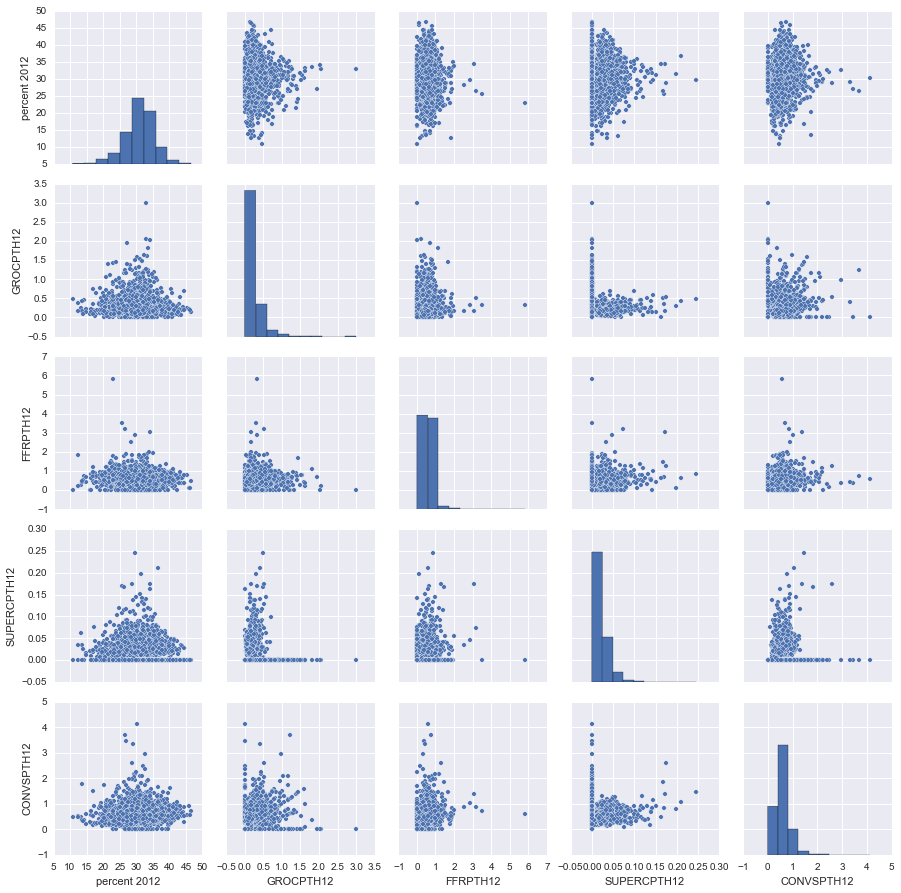

In [35]:
sns.pairplot(Obset[['percent 2012','GROCPTH12','FFRPTH12','SUPERCPTH12','CONVSPTH12']], size=2.5)

In [19]:
#remove the realy high farmers market values to see if we can get a better set. Effectively removing the upper 
#outliers. Removing top 1%
NewOB = Obset[Obset['FarmersMkts Per County'] < 15]

In [20]:
NewOB.head()

,State_x,FIPS Codes,County_x,percent 2010,percent 2011,percent 2012,FarmersMkts Per County,GROCPTH12,SUPERCPTH12,CONVSPTH12,...,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
2311,South Carolina,45001,Abbeville,34.8,34.6,34.2,1,0.142439,0.000000,0.244180,...,18,14,-22.222222,0.790861,0.675382,-14.601658,489,710.689107,548,778.438294
1108,Louisiana,22001,Acadia Parish,32.2,32.3,31.9,0,0.192086,0.048022,0.480215,...,78,86,10.256410,0.687776,0.761979,10.788819,485,610.889378,410,529.137954
2815,Virginia,51001,Accomack,35.5,35.0,36.6,3,0.479546,0.000000,0.811539,...,82,73,-10.975610,1.876473,1.659657,-11.554466,321,402.097804,554,671.463322
546,Idaho,16001,Ada,23.5,24.4,24.5,7,0.206141,0.021143,0.406996,...,7,8,14.285714,0.525171,0.553748,5.441565,527,666.234513,394,534.383583
784,Iowa,19001,Adair,31.8,32.3,31.0,1,0.250707,0.000000,0.429784,...,27,27,0.000000,0.696451,0.683008,-1.930131,372,570.671423,420,583.997255


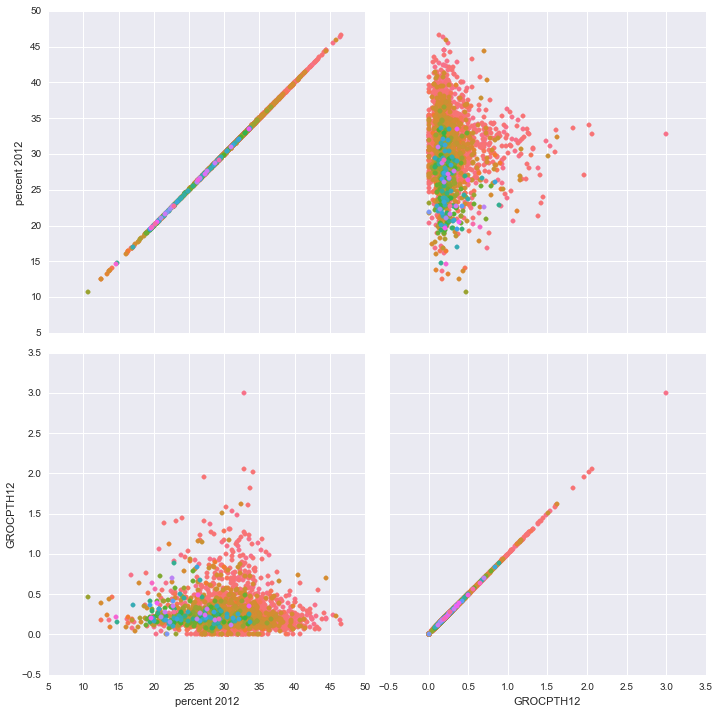

In [22]:
g = sns.PairGrid(Obset, vars=["percent 2012", "GROCPTH12"],
                 hue="FarmersMkts Per County", aspect=1, size=5)
g.map(plt.scatter)

In [17]:
list(Obset.columns.values)

[u'State_x',
 u'FIPS Codes',
 u'County_x',
 u'percent 2010',
 u'percent 2011',
 u'percent 2012',
 'FarmersMkts Per County',
 u'GROCPTH12',
 u'SUPERCPTH12',
 u'CONVSPTH12',
 u'SPECSPTH12',
 u'SNAPSPTH12',
 u'WICSPTH12',
 u'FIPS_x',
 u'State_y',
 u'County_y',
 u'LACCESS_POP10',
 u'PCT_LACCESS_POP10',
 u'LACCESS_LOWI10',
 u'PCT_LACCESS_LOWI10',
 u'LACCESS_CHILD10',
 u'PCT_LACCESS_CHILD10',
 u'LACCESS_SENIORS10',
 u'PCT_LACCESS_SENIORS10',
 u'LACCESS_HHNV10',
 u'PCT_LACCESS_HHNV10',
 u'FIPS_y',
 u'State',
 u'County',
 u'FFR07',
 u'FFR12',
 u'PCH_FFR_07_12',
 u'FFRPTH07',
 u'FFRPTH12',
 u'PCH_FFRPTH_07_12',
 u'FSR07',
 u'FSR12',
 u'PCH_FSR_07_12',
 u'FSRPTH07',
 u'FSRPTH12',
 u'PCH_FSRPTH_07_12',
 u'PC_FFRSALES02',
 u'PC_FFRSALES07',
 u'PC_FSRSALES02',
 u'PC_FSRSALES07']

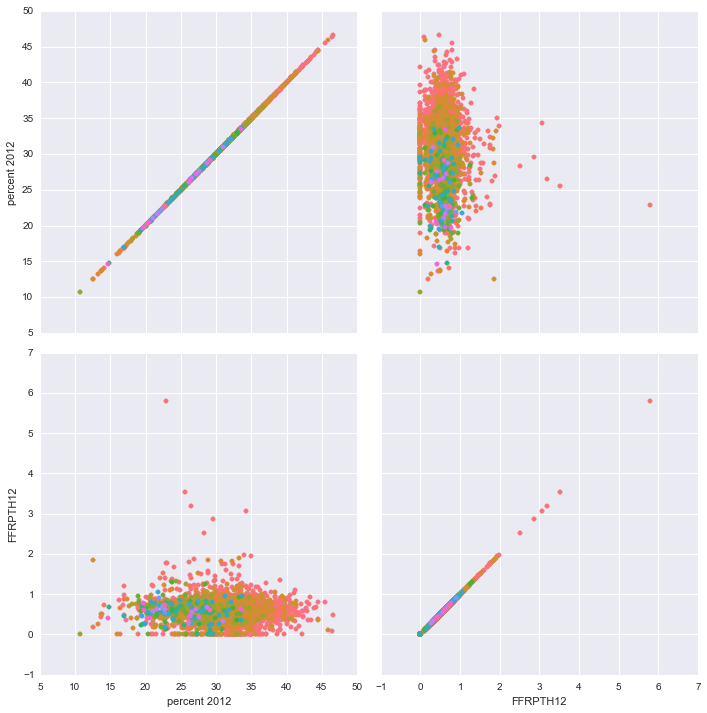

In [24]:
g = sns.PairGrid(Obset, vars=["percent 2012", "FFRPTH12"],
                 hue="FarmersMkts Per County", aspect=1, size=5)
g.map(plt.scatter)

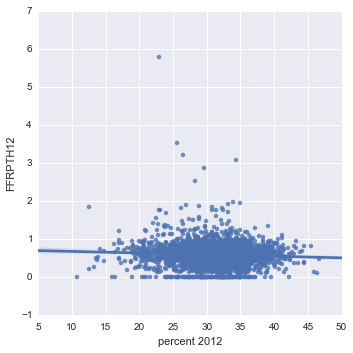

In [25]:
sns.lmplot('percent 2012','FFRPTH12',Obset)

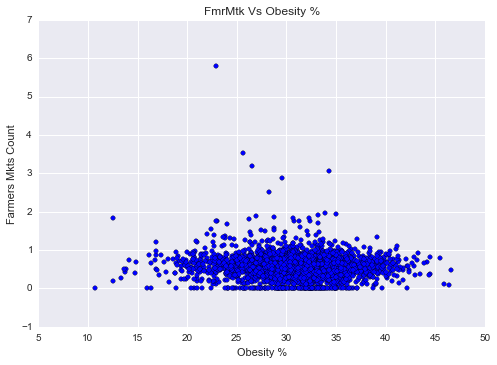

In [28]:
import matplotlib.pyplot as pltFMOb
pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('Farmers Mkts Count')
pltFMOb.title('FmrMtk Vs Obesity %')
pltFMOb.scatter(Obset['percent 2012'], Obset['FFRPTH12'], label="training points")

In [29]:
#take all the X values (in this case the obesity percent) and take them to the every power up to the 7th
#so that we can use these values in our plotting
Obper = (Obset['percent 2012'])
XObper = np.column_stack((Obper, 
                          np.power(Obper, 2), 
                          np.power(Obper, 3),
                          np.power(Obper, 4),
                          np.power(Obper, 5),
                          np.power(Obper, 6),
                          np.power(Obper, 7)))

# xvals is a vector of length 100 spanning from 5 and 50
# We use this as the x-values for a grid
# We will find y values to plot against these to sketch out the 7th deg function.
xvals = np.linspace(5,50,100)

# X_vals is the design matrix with all the 100 grid values
# With added columns of those grid values raised to the 2nd, 3rd, .. 7th power.
X_vals = np.column_stack((xvals, 
                     np.power(xvals, 2), 
                     np.power(xvals, 3),
                     np.power(xvals, 4),
                     np.power(xvals, 5),
                     np.power(xvals, 6),
                     np.power(xvals, 7)))

ys = np.vstack(Obset['FFRPTH12'].tolist())

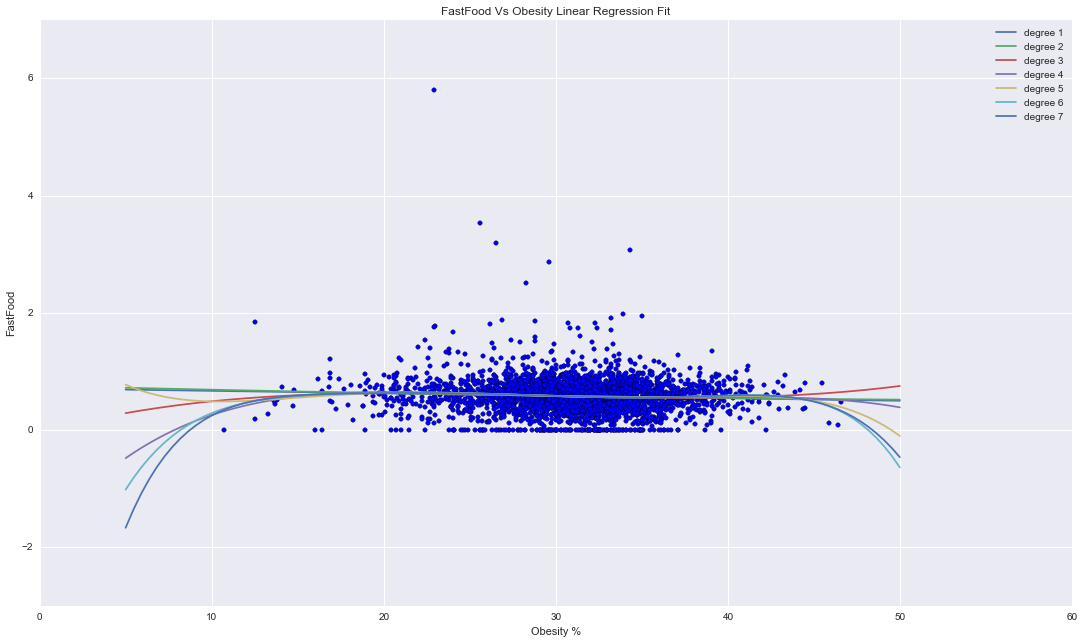

In [34]:
pltFMOb.scatter(Obset['percent 2012'], Obset['FFRPTH12'])
LRscore = []

for degree in [1,2,3,4,5,6,7]:
    lmFMOB = LinearRegression()
    lmFMOB.fit(XObper[:,:degree], ys)
    pred = lmFMOB.predict(X_vals[:,:degree])
    pltFMOb.plot(np.array(xvals), pred, label="degree %d" % degree)
    LRscore.append(lmFMOB.score(XObper[:,:degree], ys))

pltFMOb.xlabel('Obesity %')
pltFMOb.ylabel('FastFood')
pltFMOb.title('FastFood Vs Obesity Linear Regression Fit')
pltFMOb.legend(loc='upper right')
#Save the file as an image
fig = pltFMOb.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('FF_ObPer_LR.png', dpi=300)

In [32]:
print lmFMOB.intercept_
print lmFMOB.coef_
print LRscore

[-8.83622262]
[[  2.40557160e+00  -2.57798760e-01   1.49471394e-02  -5.00642417e-04
    9.57065325e-06  -9.54219206e-08   3.75489247e-10]]
[0.0038420810119844662, 0.0038760939503880154, 0.0050730940595735685, 0.0060196352519259477, 0.0066158433715498566, 0.0068843340567162903, 0.0068935458589377552]


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
results = ols('FarmersMkts Per County ~ percent 2012', Obset).fit()
print(results.summary())

## Log of the original data columns to see if those are a better fit:

In [ ]:
ObsetLog = Obset #make new log data set to use just for this
ObsetLog['LogPercent'] = np.log(ObsetLog['percent 2012'].values)

LogColNames = ['LogPercent']

for col in range(1,len(ColNames)):
    ObsetLog['Log' + str(ColNames[col])] = np.log(ObsetLog[str(ColNames[col])].values)
    LogColNames.append('Log' + str(ColNames[col]))